In [0]:
pip install gensim

In [0]:
pip install chart-studio

In [0]:
pip install plotly

In [0]:
pip install pyLDAvis

In [0]:
pip install nltk


In [0]:
import numpy as np
import pandas as pd
import re
import nltk

#plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from chart_studio.grid_objs import Grid, Column
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected = True)

#LDA
import pyLDAvis
import pyLDAvis.gensim
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
pyLDAvis.enable_notebook()
from gensim import corpora,models

from scipy import stats

import warnings
warnings.filterwarnings('ignore')
import plotly.offline as pyo
pyo.init_notebook_mode()


twitter_tweets = pd.read_csv('tweets.csv', error_bad_lines= False)
fake__users = pd.read_csv('users.csv')
tweets_details = pd.read_csv('tweetdetails.csv',error_bad_lines= False)

fake__users['Date'] = pd.to_datetime(fake__users['created_at'])
fake__users = fake__users[pd.notnull(fake__users['created_at'])]
fake__users = fake__users.drop_duplicates(subset=['id'])
fake__users['Date'] = fake__users['Date'].apply(lambda x: x.strftime('%Y-%m'))

u_name = pd.DataFrame(fake__users.name.str.split(' ',1).tolist(), columns = ['first','last'])

user_name = u_name.groupby('first', as_index=False).size().reset_index(name='counts')

users_name = user_name.sort_values('counts', ascending=False).head(20)


#bar plot

#first names
first_name = u_name.groupby('first', as_index=False).size().reset_index(name='counts')
first_name = first_name.sort_values('counts', ascending=False).head(20)
df = go.Bar(
    x = first_name['counts'],
    y = first_name['first'],
    orientation = 'h',
    name = 'First Name'
)

#Last names
last_name = u_name.groupby('last', as_index=False).size().reset_index(name='counts')
last_name = last_name.sort_values('counts',ascending=False).head(20)
df1 = go.Bar(
    x=last_name ['counts'],
    y=last_name ['last'],
    orientation = 'h',
    name = 'Last Name'
)
fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('First Name','Last Name'))
fig.append_trace(df,1,1)
fig.append_trace(df1,1,2)
fig['layout'].update(height=400, width = 1000, title='First and Last Names of Fake Accounts')
plot(fig, filename='basic-line')

#remove the sepcial characters
des = fake__users.description.copy().astype(str)
des = des.str.replace('[^\w\s}]','')
des = des.str.replace('[\\r|\\n\\t|_]','')
des = des.str.strip()

tweets_des = tweets_details.copy()
tweets_des.des = des
tweets_des.des = tweets_des.des.apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop)]))

#convert sample documents into a list
doc_set = tweets_des.des.values.copy()
#loop through the document list
texts = [text.split(' ') for text in doc_set]
#turn our tokenized documents into an id <->  term dictionary
dictionary = corpora.Dictionary(texts)
#convert tokenized documents into a document-term matrix
corp = [dictionary.doc2bow(text) for text in texts]
#generate LDA model
ldamodel = models.ldamodel.LdaModel(corp, num_topics=30, id2word = dictionary)

df3 = pyLDAvis.gensim.prepare(ldamodel, corp, dictionary)
df3

#group by Date, create a count and sort
users = fake__users.groupby('Date', as_index = False).size().reset_index(name = 'counts')
userssum = users.sort_values('Date')


trace0 = go.Bar(name = "Accounts Created Over Time", x = userssum.Date, y = userssum.counts)
data = ([trace0])

layout = go.Layout(
    title = "Accounts created 2009-2017",
    yaxis = dict(
        title = 'no. of Accounts created',
        range = [0,100],
        titlefont=dict(
            size=20,
        )
    ),
    
    xaxis = dict(
        title = 'Year',
        range = ['2009-01','2017-1'],
        titlefont=dict(
            size=20,
        )
    )
)

fig = go.Figure(data=data, layout=layout)
fig['layout'].update()
plot(fig)


# heat map showing the days and hours of users
m = pd.pivot_table(tweets_details, values = 'user_key', index = 'created_strDayofweek', columns = 'created_strMonth', aggfunc = len, fill_value=0, dropna=False)
z=m.as_matrix()

trace = go.Heatmap(z=z,
                x=[i for i in np.arange(0,24)],
                y=['Sunday', 'Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday'],
                colorscale = 'Jet'
               )

layout = go.Layout(
  title = 'No. of Tweets Per Day Per Month',
  xaxis=dict(
      nticks=24,
      title = 'Month',
      titlefont = dict(
      size=20)),

  yaxis = dict(
  ),

)
data = [trace]
fig = go.Figure(data=data,layout=layout)
fig['layout'].update()
plot(fig,filename='tweets.html')













  
  








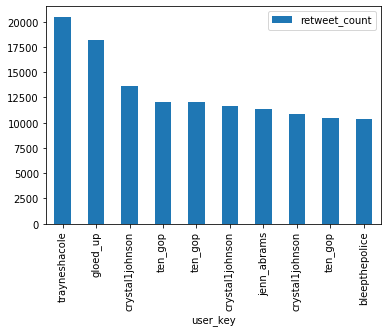

In [7]:

import pandas as pd



twitter_tweets = pd.read_csv('tweets.csv', error_bad_lines= False)

#sort csv by highest number of retweet counts
highestrt = twitter_tweets.sort_values(by = ['retweet_count'], ascending = False)

#Dataframe will only be the top ten
df = highestrt.head(10)

#plot the bar chart using user key as the x value and retweet count as the y value
df.plot.bar(x = 'user_key', y = ['retweet_count'])